In [ ]:
# Core
import seaborn as sns
#import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import graphviz
import pprint
import pandas as pd

# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split

In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
Fake_path = '/content/drive/MyDrive/projeto_AL/Fake.csv'

In [ ]:
fake_df = pd.read_csv(Fake_path)
df_fake = fake_df.copy()

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_fake['label'] = 1

In [ ]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
True_path = '/content/drive/MyDrive/projeto_AL/True.csv'
true_df = pd.read_csv(True_path)
df_true = true_df.copy()

In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_true['label'] = 0
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df= pd.concat([df_true, df_fake]).reset_index(drop = True)

df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

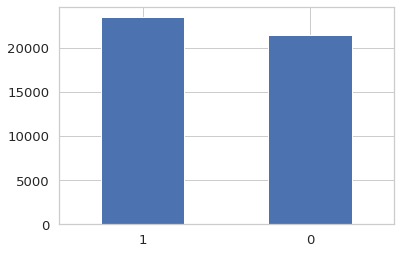

In [ ]:
#distribuição de target
df["label"].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 360);

In [ ]:
#Distribuição das notícias por tema
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

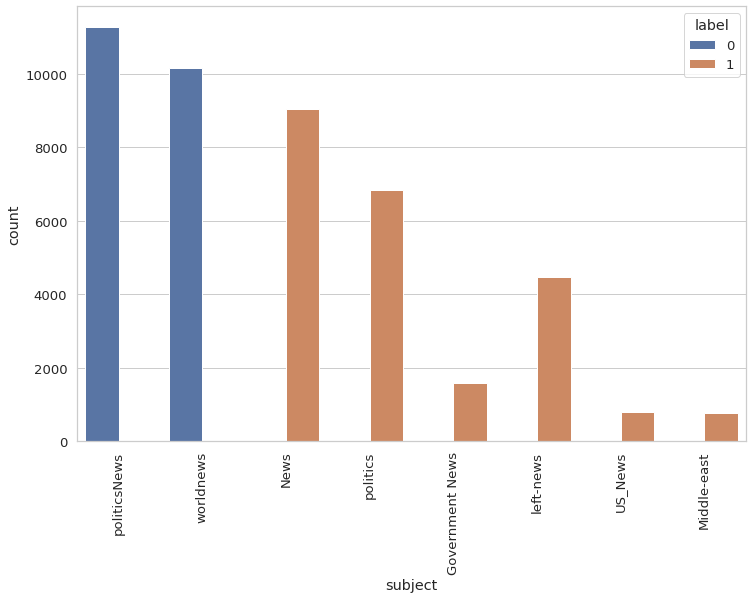

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "label", data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

politicsNews e politics tratam do mesmo tema

In [ ]:
del_url = "http"
filter1 = df['date'].str.contains(del_url)

In [ ]:
df = df[~filter1]

In [ ]:
#Mudando o formato das datas
date_pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter = df['date'].str.contains(date_pattern)

In [ ]:
df=df[filter]

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0


In [ ]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df.head()

,title,text,subject,date,label,Year,Month
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0,2017,12
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0,2017,12
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0,2017,12
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0,2017,12
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0,2017,12


In [ ]:
df[df.duplicated()]

,title,text,subject,date,label,Year,Month
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,2017-11-30,0,2017,11
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,2017-11-08,0,2017,11
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,2017-11-02,0,2017,11
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,2017-11-02,0,2017,11
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,2017-10-30,0,2017,10
...,...,...,...,...,...,...,...
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,2017-08-25,0,2017,8
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,2017-08-22,0,2017,8
31359,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,2017-09-09,1,2017,9
32863,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,2017-03-10,1,2017,3


In [ ]:
df = df.drop_duplicates()

In [ ]:
len(df)

44679

[Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018')]

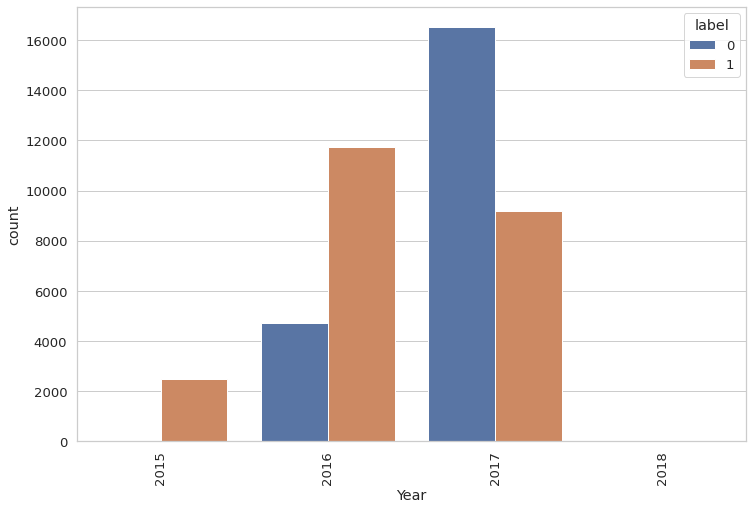

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "Year", hue = "label", data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
df_fake= df[df["label"]==1]
df_real= df[df["label"]==0]

In [ ]:
df_fake= df_fake.groupby(['date'])['label'].count()


In [ ]:
#df_fake = pd.DataFrame(df_fake)
#df_fake

,label
date,
2015-03-31,8
2015-04-01,2
2015-04-02,1
2015-04-04,5
2015-04-05,13
...,...
2018-02-15,9
2018-02-16,8
2018-02-17,7


In [ ]:
#df_real= df_real.groupby(['date'])['label'].count()

In [ ]:
#df_real= pd.DataFrame(df_real)
#df_real

,label
date,
2016-01-13,30
2016-01-14,15
2016-01-15,23
2016-01-16,5
2016-01-17,3
...,...
2017-12-27,53
2017-12-28,5
2017-12-29,6


Fazer gráfico com as duas bases

Limpando a base

In [ ]:
df['full_text']= df['title']+ ' ' + df['text']

In [ ]:
pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]
full_text = df['full_text'].str.split() # capturar todas as palavras
full_text = full_text.values.tolist() # criar lista
corpus=[word for i in full_text for word in i]

In [ ]:
def clean_text(text):
    if type(text) == np.float:
        return ""
    text = text.lower() 
    text = re.sub("'", "", text) 
   # text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    text = re.sub('(?:https?|ftp):\/\/?[\w/\-?=%.]+\.[\w/\-&?=%.]+'," ",text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^a-z0-9]"," ", text)
    text = text.split()
    text = [w for w in text if not w in stop]
    text = " ".join(word for word in text)
    return text

In [ ]:
df['cleaned_full_text']= [clean_text(text) for text in df['full_text'] ]

In [ ]:
print(df['full_text'][3])

FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked Democratic emails began appearing online, according to the newspaper, which cited four current and former U.S. and foreign officials. Besides the information from the Australians, the probe by the Federal Bureau of Investigation was also propelled by intelligence from other friendly governments, including the British an

In [ ]:
print(df['cleaned_full_text'][3])

fbi russia probe helped australian diplomat tip nyt washington reuters trump campaign adviser george papadopoulos told australian diplomat may 2016 russia political dirt democratic presidential candidate hillary clinton new york times reported saturday conversation papadopoulos diplomat alexander downer london driving factor behind fbi decision open counter intelligence investigation moscow contacts trump campaign times reported two months meeting australian officials passed information came papadopoulos american counterparts leaked democratic emails began appearing online according newspaper cited four current former u foreign officials besides information australians probe federal bureau investigation also propelled intelligence friendly governments including british dutch times said papadopoulos chicago based international energy lawyer pleaded guilty oct 30 lying fbi agents contacts people claimed ties top russian officials first criminal charge alleging links trump campaign russia

In [ ]:
df_fake= df[df["label"]==1]
df_real= df[df["label"]==0]

In [ ]:
list_fake_news = []
list_fake_news.append(df_fake['cleaned_full_text'])
corpus_fake_news=[word for i in list_fake_news for word in i]

In [ ]:
unique_string_fake=(" ").join(corpus_fake_news)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

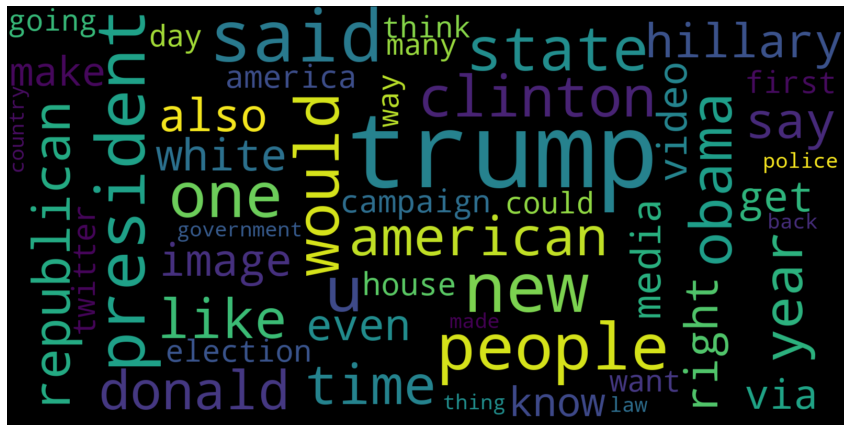

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stop,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(unique_string_fake)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
list_real_news = []
list_real_news.append(df_real['cleaned_full_text'])
corpus_real_news=[word for i in list_real_news for word in i]

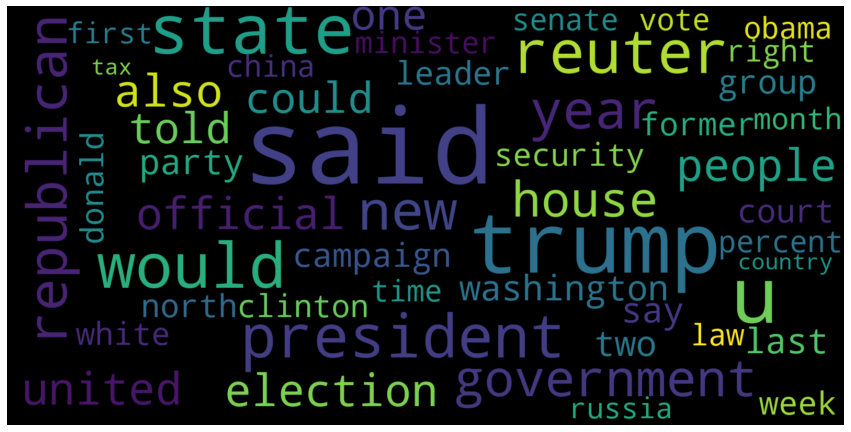

In [ ]:
unique_string_real=(" ").join(corpus_real_news)
wordcloud = WordCloud(width=1600, stopwords=stop,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(unique_string_real)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:

maxlen = -1
for doc in df.cleaned_full_text:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a News Content is =", maxlen)
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.cleaned_full_text], nbins = 50)
fig.show()

The maximum number of words in a News Content is = 5077


In [ ]:
y = df['label']
x = df['full_text']

In [ ]:
x.shape[0]

44679

In [ ]:
y.shape[0]

44679

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [ ]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
vec_train = CountVectorizer().fit(x_train)
x_vec_train = vec_train.transform(x_train)
x_vec_test = vec_train.transform(x_test)
model = LogisticRegression(C=2.5)
model.fit(x_vec_train, y_train)
predicted_value = model.predict(x_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9974868486918596


In [ ]:
x_vec_train.shape[0]

35743

In [ ]:
y_train.shape[0]

35743

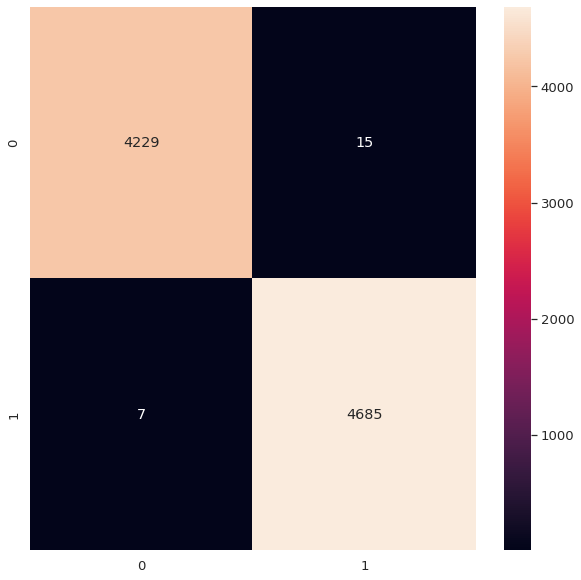

In [ ]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')

In [ ]:
y = df['label']
x = df['title']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [ ]:
vec_train = CountVectorizer().fit(x_train)
x_vec_train = vec_train.transform(x_train)
x_vec_test = vec_train.transform(x_test)
model = LogisticRegression(C=2.5)
model.fit(x_vec_train, y_train)
predicted_value = model.predict(x_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9696989601889192


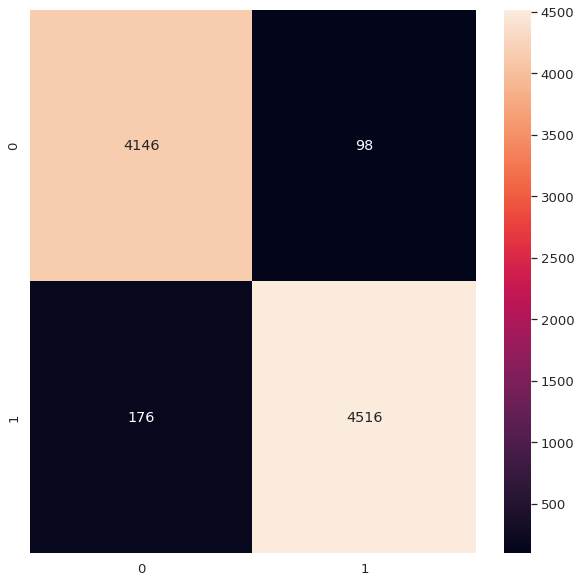

In [ ]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')

In [ ]:
y = df['label']
x = df['text']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [ ]:
vec_train = CountVectorizer().fit(x_train)
x_vec_train = vec_train.transform(x_train)
x_vec_test = vec_train.transform(x_test)
model = LogisticRegression(C=2.5)
model.fit(x_vec_train, y_train)
predicted_value = model.predict(x_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9979356041888132


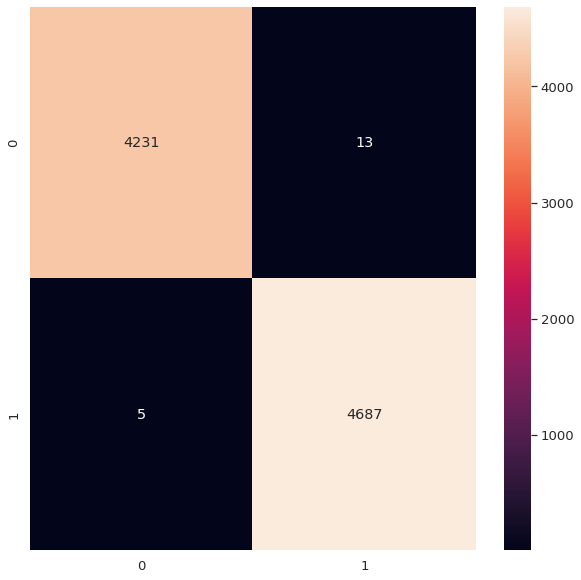

In [ ]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')